<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/TP2/Tp2_CyT_Girvan-Newman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
import seaborn as sns

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx

from glob import glob
from pathlib import Path
import community
!pip install networkx
!pip install powerlaw
!pip install community
import powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24788 sha256=71731ab7afbd150b4f1d38af3eafb88fbb6ac5f00693db13ab65fe3e50af4b7f
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [2]:
!wget -q https://www.dropbox.com/s/eei6gnw10o20mcn/DataSujetos.zip?dl=1 -O DataSujetos.zip
!unzip -q DataSujetos

#  TP2: Redes en el Cerebro

# 1. Visualización


In [3]:
def subjectmatrix2graphslist_2(correlation_matrix, densities):
    """
    Toma una matriz de input y devuelve una lista de grafos con la densidad de aristas correspondiente
    """
    
    n = correlation_matrix.shape[0]
    n2m1 = (n*n-1)
    
    sorted_correlations = sorted(correlation_matrix.values.flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*n2m1)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs


   ### Calculo Matriz Promedio por Estadíos

In [4]:
## Aqui comienza

estadios=["W","N1","N2","N3"]
matrices=[]

for e in estadios:
    # inicializo matriz con ceros  
    matriz_promedio = []
    for i in range(116):
        a = [0]*116
        matriz_promedio.append(a)
      
    # leo y sumo las matrices de todos los sujetos para el estadio e 
    filenames = glob('DataSujetos/'+e+'_*.csv')   
    for filename in filenames:
        correlation_matrix = pd.read_csv(filename, header=None)
        n = correlation_matrix.shape[0]
        correlation_matrix -= np.diag(np.ones(n))
        matriz_promedio= np.add(matriz_promedio, correlation_matrix)

    # Hago el promedio
    matriz_promedio= matriz_promedio/18
    # La guardo 
    matrices.append(matriz_promedio)
print(matrices)

    

[          0         1         2    ...       113       114       115
0    0.000000  0.875693  0.640179  ...  0.481611  0.413802  0.188360
1    0.875693  0.000000  0.585738  ...  0.468672  0.374851  0.200169
2    0.640179  0.585738  0.000000  ...  0.440531  0.399424  0.225343
3    0.620273  0.614653  0.844262  ...  0.414304  0.389722  0.215749
4    0.537648  0.510480  0.725156  ...  0.381786  0.299067  0.138788
..        ...       ...       ...  ...       ...       ...       ...
111  0.512767  0.495661  0.443559  ...  0.720990  0.645444  0.211643
112  0.438433  0.400285  0.447182  ...  0.752909  0.628123  0.187033
113  0.481611  0.468672  0.440531  ...  0.000000  0.749758  0.303311
114  0.413802  0.374851  0.399424  ...  0.749758  0.000000  0.355704
115  0.188360  0.200169  0.225343  ...  0.303311  0.355704  0.000000

[116 rows x 116 columns],           0         1         2    ...       113       114       115
0    0.000000  0.904321  0.735057  ...  0.479057  0.349738  0.158671
1    0

<Figure size 432x432 with 0 Axes>

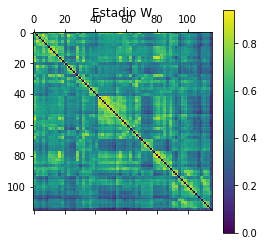

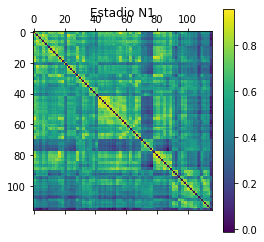

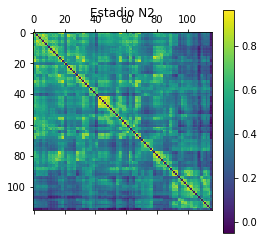

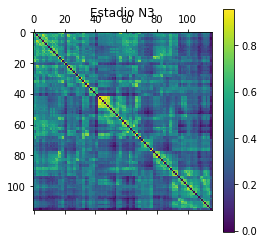

In [5]:
plt.figure(figsize=(6,6))
for i, e in enumerate(estadios):    
#   plt.subplot(2,2,i+1)
    plt.matshow(matrices[i])
    plt.colorbar()
    plt.title('Estadio '+e)
    

W 0
N1 1
N2 2
N3 3


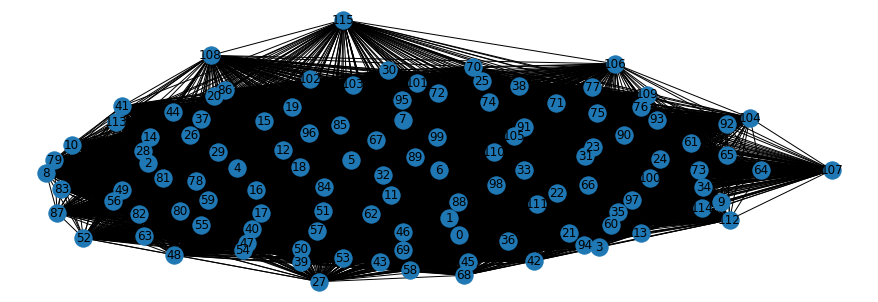

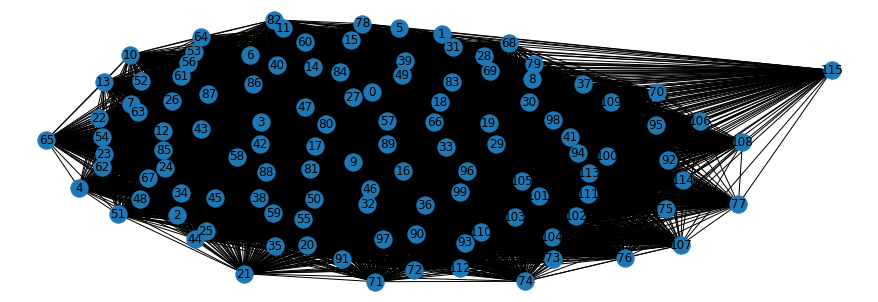

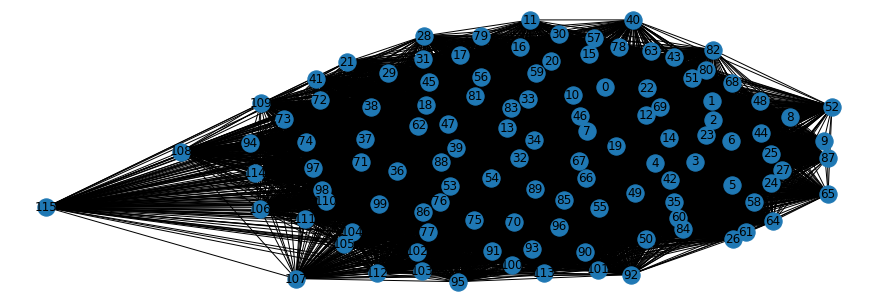

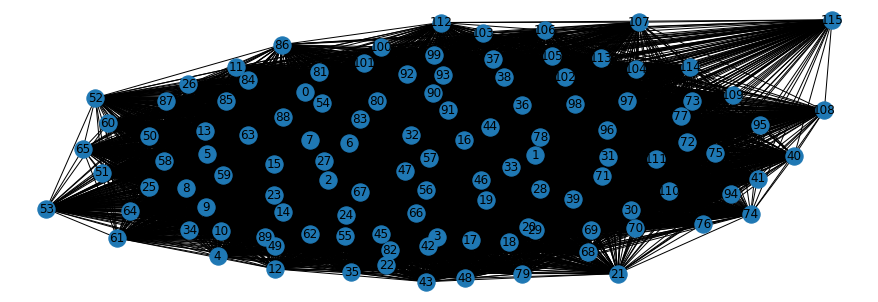

In [6]:
for i, e in enumerate(estadios):    
    print(e, i)
    G_promedio = nx.from_pandas_adjacency(matrices[i])
    plt.figure(figsize=(12,4))
    #plt.subplot(131)
    nx.draw(G_promedio, with_labels=True)

W 0
N1 1
N2 2
N3 3


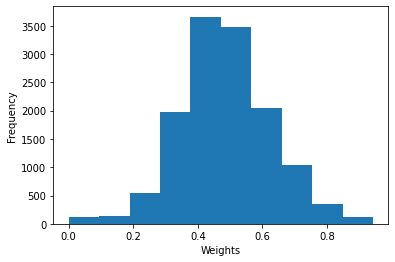

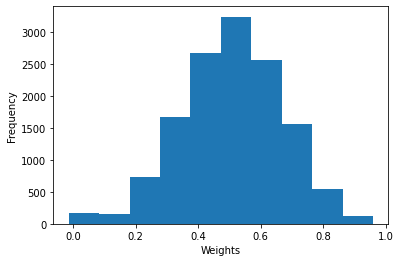

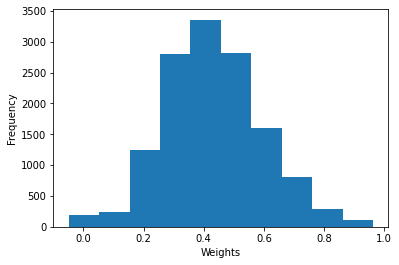

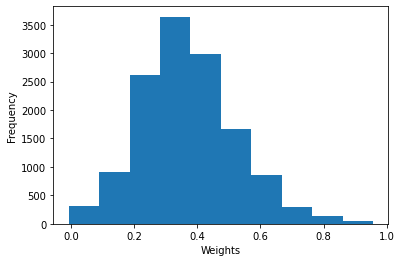

In [ ]:
for i, e in enumerate(estadios):    
    print(e, i)
    plt.figure()
    plt.hist(matrices[i].values.flatten())
    plt.ylabel('Frequency')
    plt.xlabel('Weights');


In [7]:
# Para cada estadío, genero grafos para 50 densidades entre 0 y 0.3
# Estos serían los grafos no pesados para distintas densidades

estadios=["W","N1","N2","N3"]
densities = np.linspace(0,0.3,50)

graphs = {}
for i,e in enumerate(estadios):
    Gs = subjectmatrix2graphslist_2(matrices[i], densities)
    name = e
    print(i)
    graphs[name] = Gs


    

0
1
2
3


In [9]:
graphs["N3"]

## 


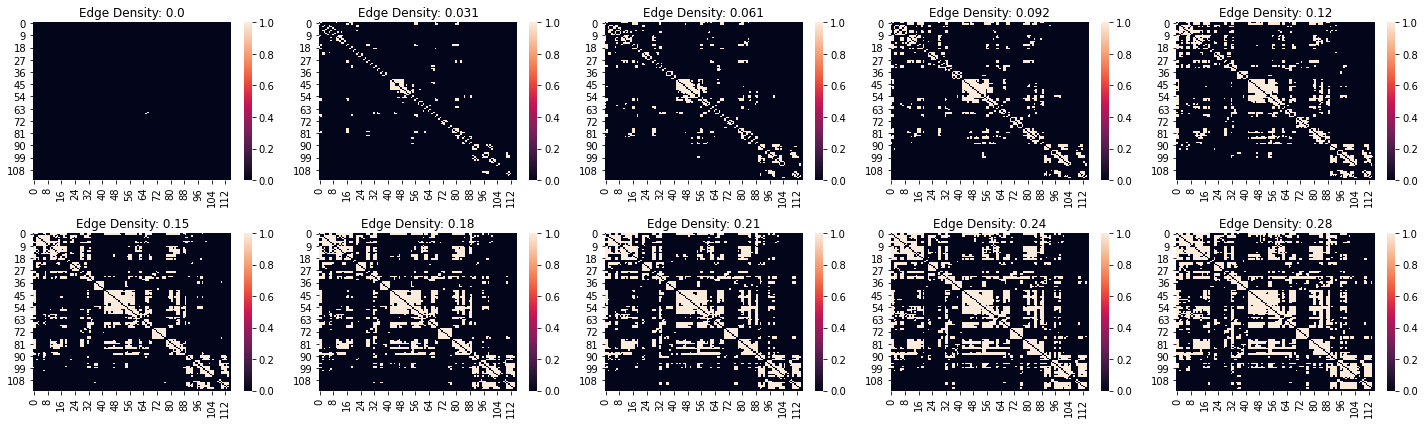

In [ ]:
# Muestro matrices de estadío "W", para algunas densidades (::5 entiendo que esto va cada 5, y entonces trae 10 grafos )

plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['W'][::5][:10]):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i*5]))
plt.tight_layout()

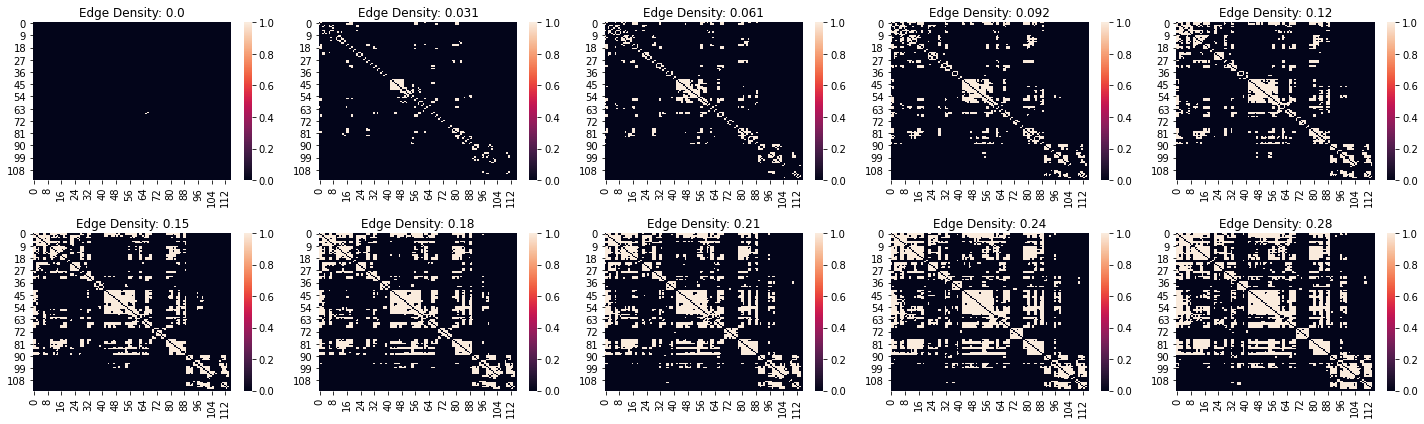

In [ ]:
# Igual que lo anterior para estadío N1

plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['N1'][::5][:10]):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i*5]))
plt.tight_layout()

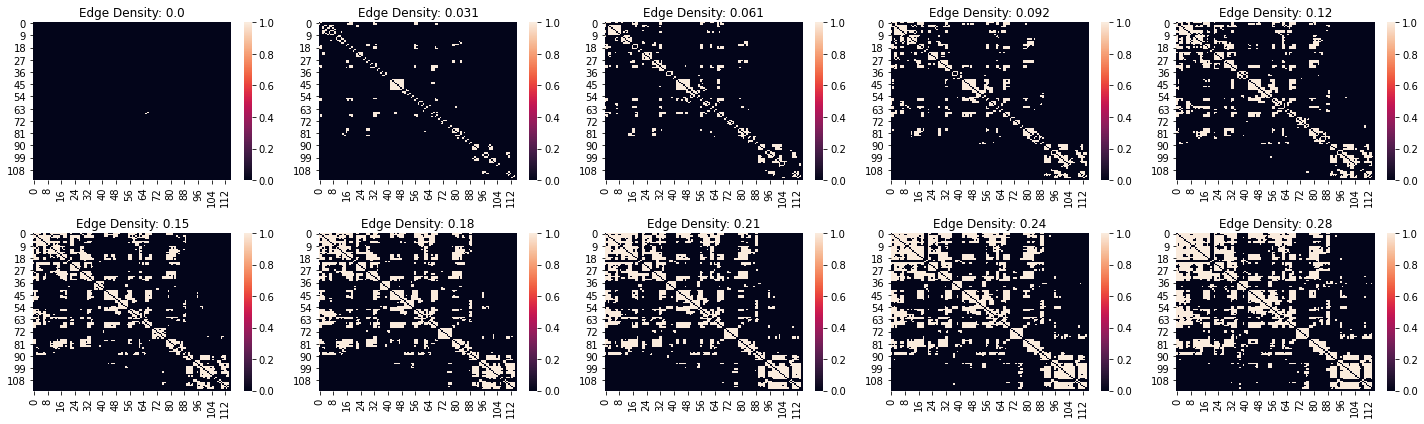

In [ ]:
# Igual que lo anterior para estadío N2

plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['N2'][::5][:10]):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i*5]))
plt.tight_layout()

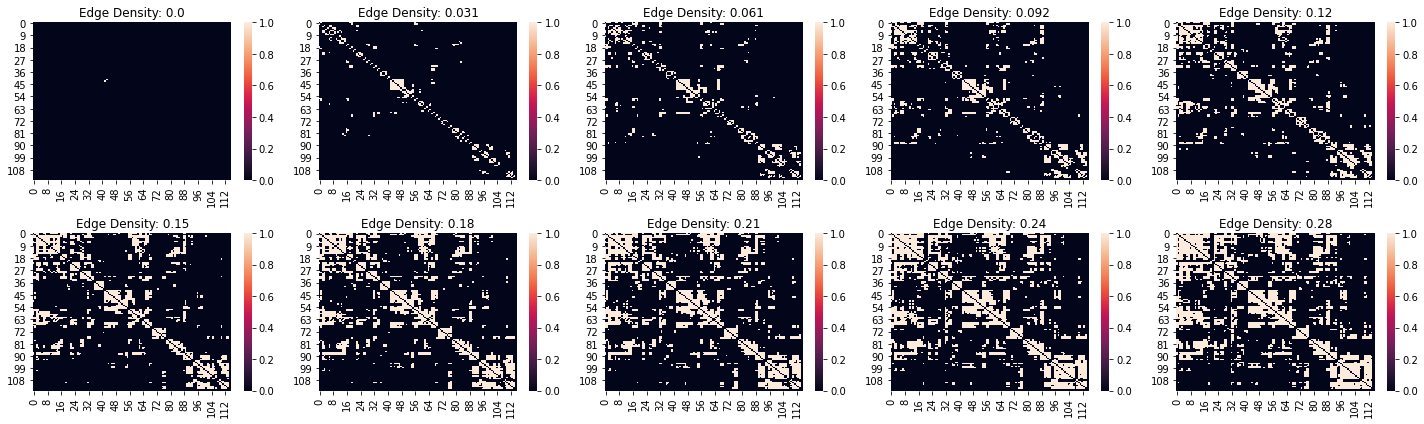

In [ ]:
# Igual que lo anterior para estadío N3

plt.figure(figsize=(20,6))
for i, G in enumerate(graphs['N3'][::5][:10]):
    plt.subplot(2,5,i+1)
    sns.heatmap(nx.to_numpy_array(G))
    plt.title('Edge Density: {:0.2}'.format(densities[i*5]))
plt.tight_layout()

Text(0.5, 1.0, 'Edge Density: 0.21')

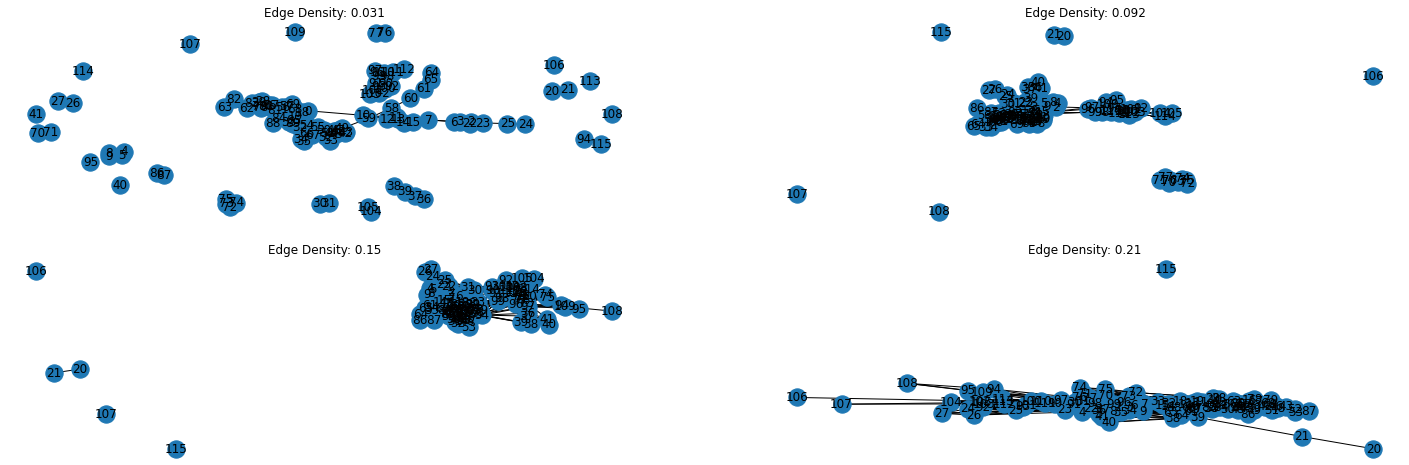

In [ ]:
# Visualizar el grafo no pesado para distintos valores de δ que resulten interesantes. 
# visualizarlo como grafo 

plt.figure(figsize=(25,8))
plt.subplot(2,2,1)
nx.draw(graphs['W'][5],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[5]))
plt.subplot(2,2,2)
nx.draw(graphs['W'][15],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[15]))
plt.subplot(2,2,3)
nx.draw(graphs['W'][25],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[25]))
plt.subplot(2,2,4)
nx.draw(graphs['W'][35],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[35]))


Text(0.5, 1.0, 'Edge Density: 0.21')

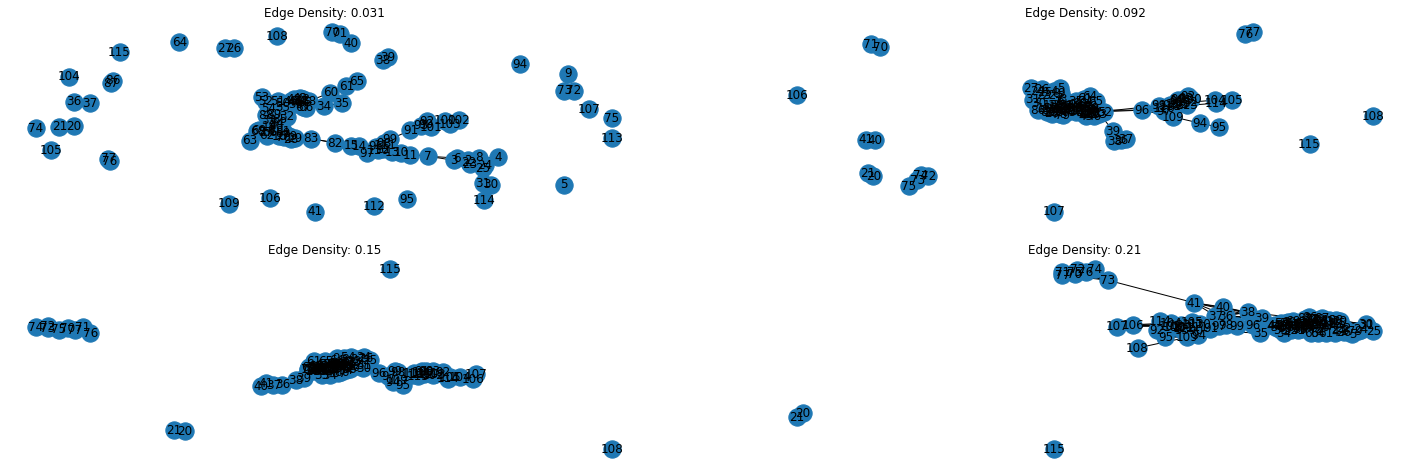

In [ ]:
# Visualizar el grafo no pesado para distintos valores de δ que resulten interesantes. 
# visualizarlo como grafo 

plt.figure(figsize=(25,8))
plt.subplot(2,2,1)
nx.draw(graphs['N1'][5],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[5]))
plt.subplot(2,2,2)
nx.draw(graphs['N1'][15],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[15]))
plt.subplot(2,2,3)
nx.draw(graphs['N1'][25],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[25]))
plt.subplot(2,2,4)
nx.draw(graphs['N1'][35],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[35]))


Text(0.5, 1.0, 'Edge Density: 0.21')

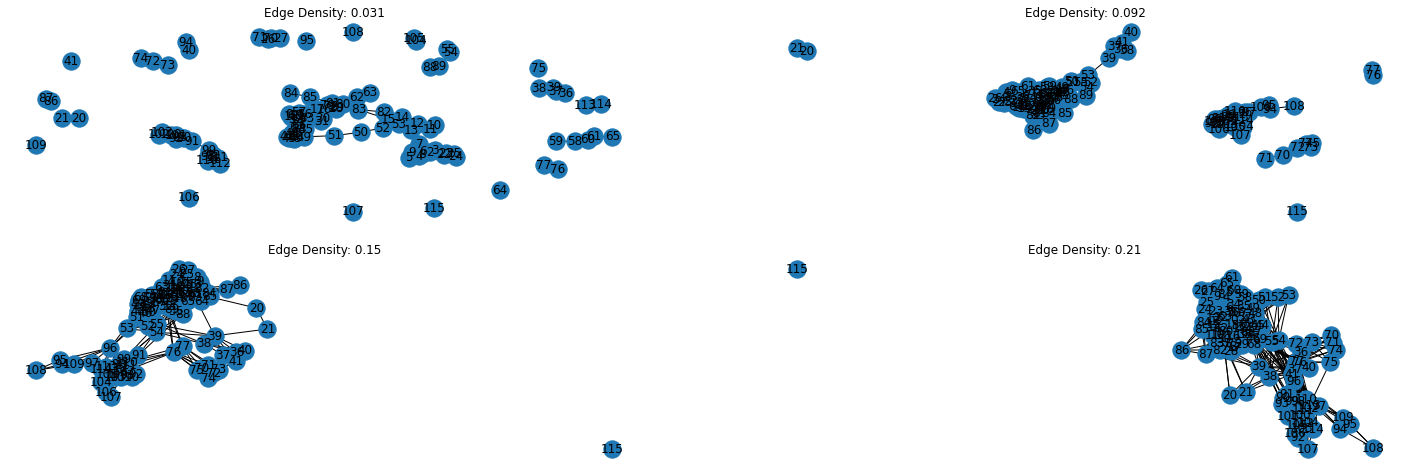

In [9]:
# Visualizar el grafo no pesado para distintos valores de δ que resulten interesantes. 
# visualizarlo como grafo 

plt.figure(figsize=(25,8))
plt.subplot(2,2,1)
nx.draw(graphs['N2'][5],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[5]))
plt.subplot(2,2,2)
nx.draw(graphs['N2'][15],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[15]))
plt.subplot(2,2,3)
nx.draw(graphs['N2'][25],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[25]))
plt.subplot(2,2,4)
nx.draw(graphs['N2'][35],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[35]))


Text(0.5, 1.0, 'Edge Density: 0.21')

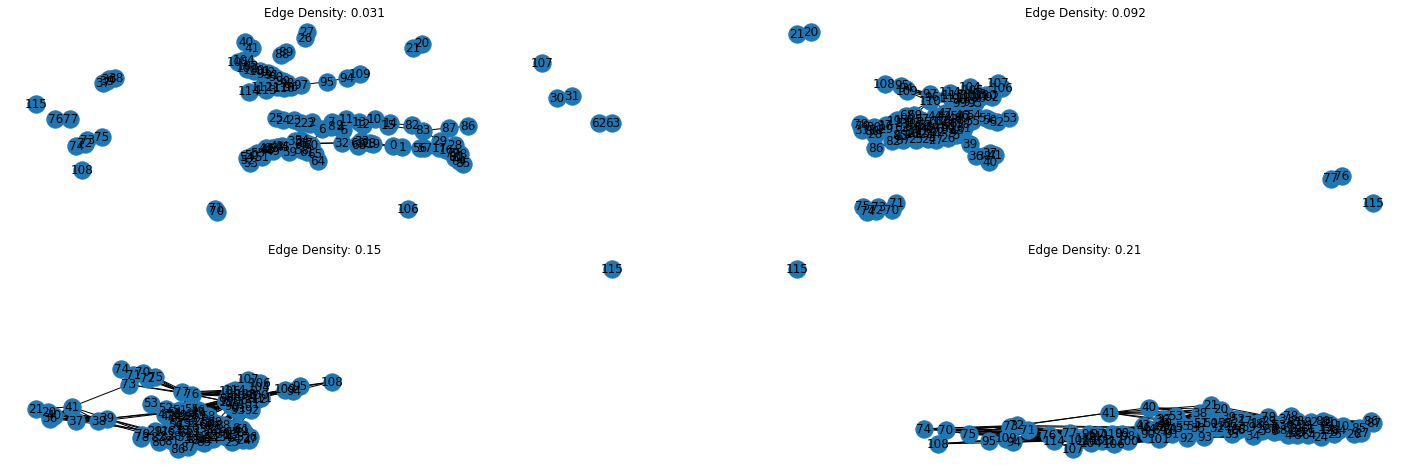

In [10]:
# Visualizar el grafo no pesado para distintos valores de δ que resulten interesantes. 
# visualizarlo como grafo 

plt.figure(figsize=(25,8))
plt.subplot(2,2,1)
nx.draw(graphs['N3'][5],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[5]))
plt.subplot(2,2,2)
nx.draw(graphs['N3'][15],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[15]))
plt.subplot(2,2,3)
nx.draw(graphs['N3'][25],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[25]))
plt.subplot(2,2,4)
nx.draw(graphs['N3'][35],with_labels=True)
plt.title('Edge Density: {:0.2}'.format(densities[35]))


In [ ]:
avg_clustering = []
names= []
for name, Gs in graphs.items():
    avg_clustering_ = [nx.average_clustering(G) for G in Gs]
    names_ = name

    avg_clustering.append(avg_clustering_)
    names.append(names_)
avg_clustering = np.vstack(avg_clustering)

In [ ]:
avg_clustering

array([[0.        , 0.06321839, 0.11642036, 0.21387521, 0.3238711 ,
        0.37814269, 0.39398858, 0.42845411, 0.4525423 , 0.46601546,
        0.48800036, 0.50741305, 0.515354  , 0.5561275 , 0.56913077,
        0.55975404, 0.56716033, 0.58027467, 0.59836411, 0.60248004,
        0.61942377, 0.63525702, 0.63899465, 0.635552  , 0.64593499,
        0.64644992, 0.65035226, 0.65537583, 0.65120236, 0.6525662 ,
        0.6494178 , 0.64976178, 0.65165564, 0.65533795, 0.65825469,
        0.66913138, 0.67016222, 0.67357935, 0.67431102, 0.67389548,
        0.67673646, 0.67225316, 0.67474402, 0.67601976, 0.67689557,
        0.69434729, 0.69442459, 0.69435968, 0.6964015 , 0.69703749],
       [0.        , 0.08189655, 0.09971264, 0.21126847, 0.26797345,
        0.28508637, 0.35616323, 0.36855388, 0.40480579, 0.41218599,
        0.4343836 , 0.45289954, 0.47809365, 0.50990172, 0.53717659,
        0.53351996, 0.55635569, 0.57441559, 0.585297  , 0.59997987,
        0.61108144, 0.61551323, 0.61094173, 0.6

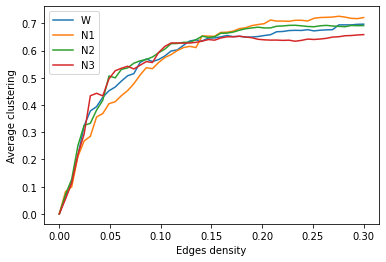

In [ ]:
plt.plot(densities, avg_clustering.T);
plt.legend(names)
plt.xlabel('Edges density')
plt.ylabel('Average clustering');

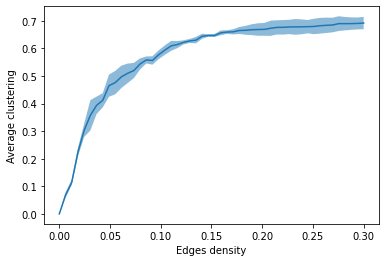

In [ ]:
u = avg_clustering.mean(0)
s = avg_clustering.std(0)
plt.fill_between(densities,u-s,u+s, alpha=0.5);
plt.plot(densities, u);
plt.xlabel('Edges density')
plt.ylabel('Average clustering');

In [ ]:
 # seguir aca MAJO
avg_centrality = []
names= []
for name, Gs in graphs.items():
    avg_centrality_ = [nx.degree_centrality(G) for G in Gs]
    names_ = name

    avg_centrality.append(avg_centrality_)
    names.append(names_)

avg_centrality = np.vstack(avg_centrality)


In [ ]:
avg_centrality[0][1].

AttributeError: ignored

In [ ]:
plt.plot(densities, avg_centrality.T);
plt.legend(names)
plt.xlabel('Edges density')
plt.ylabel('Average centrality');

In [ ]:
 # caminos mas cortos
 # seguir aca MAJO
 for C in (G_N1_UMBRAL.subgraph(c).copy() for c in nx.connected_components(G_N1_UMBRAL)):
     print(nx.average_shortest_path_length(C))

avg_shortest_path = []
names= []
for name, Gs in graphs.items():

    avg_clustering_ = [nx.average_clustering(G) for G in Gs]
    names_ = name

    avg_clustering.append(avg_clustering_)
    names.append(names_)
avg_clustering = np.vstack(avg_clustering)

## Tarea 2

In [10]:
W=matrices[0]
W.to_numpy()

W=W.to_numpy()
G_obs = nx.from_numpy_matrix(W)# u

In [11]:
pos=nx.spring_layout(graphs["W"][12], k=0.4)

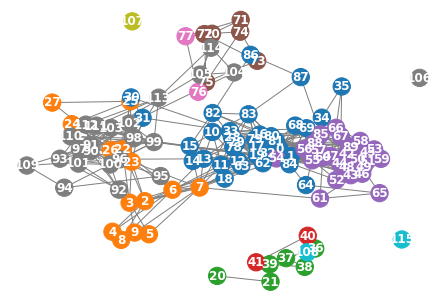

In [12]:
modulos = community.best_partition(graphs["N1"][15])
values_obs = [v for n,v in modulos.items()]
nx.draw(graphs["W"][12],pos=pos, with_labels=True,cmap=plt.cm.tab10,font_weight='bold',node_color = values_obs, font_color='white', edge_color='gray')

In [13]:
#Es el comando best_partition. Luego se le mide la modularidad al resultado de best_partition y en principio ahí te da el número.
estadio=[]
comunidades=[]
comunidades2=[]
densidad=[]
modularidad=[]
modularidad2=[]

for e in estadios:
    for i,G in enumerate (graphs[e][::5][:10]):
        estadio.append(e)
        densidad.append(densities[i*5])
        partition=community.best_partition(G)

        comunidades.append(float(len(set(partition.values()))))
        modularidad.append(community.modularity(partition,G))

        G2 = nx.gnm_random_graph(G.number_of_nodes(),G.number_of_edges())  
        partition2 = community.best_partition(G2)
        comunidades2.append(float(len(set(partition2.values()))))
        modularidad2.append(community.modularity(partition2, G2))



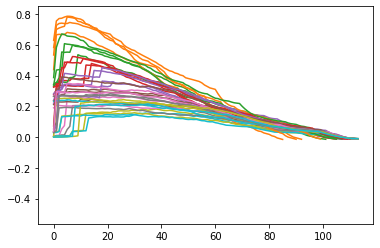

In [15]:
#Girvan-Newman


def partition_set_to_dict(m):
    d = {}
    for i,c in enumerate(m):
        for n in c:
            d[n] = i
    return d

estadio=[]
comunidades=[]
comunidades2=[]
densidad=[]
modularidad=[]
modularidad2=[]

for e in estadios:
    for i,G in enumerate (graphs[e][::5][:10]):
        estadio.append(e)
        densidad.append(densities[i*5])
        #partition=community.best_partition(G)
        modulos = nx.community.girvan_newman(G)
        modulos = list(modulos)
        modularity = []

        for m in modulos:
          modularity.append(community.modularity(partition_set_to_dict(m),G))
        plt.plot(modularity);
        idx = np.argmax(modularity)
        m = modulos[idx]

    
# modulos = nx.community.girvan_newman(G_obs)
# modulos = list(modulos)
# modularity = []
# for m in modulos:
#     modularity.append(community.modularity(partition_set_to_dict(m),G_obs))
# plt.plot(modularity);
# idx = np.argmax(modularity)
# m = modulos[idx]

<function matplotlib.pyplot.show>

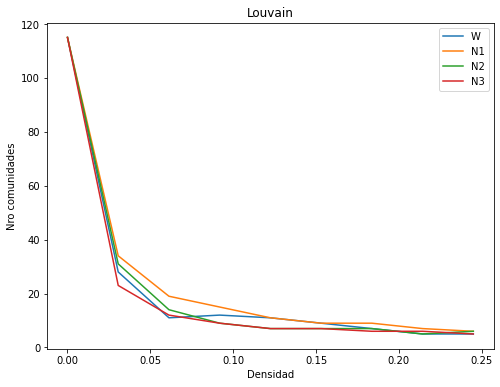

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(densidad[0:9],comunidades[0:9], label="W")
plt.plot(densidad[0:9],comunidades[10:19], label="N1")
plt.plot(densidad[0:9],comunidades[20:29], label="N2")
plt.plot(densidad[0:9],comunidades[30:39], label="N3")
plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("Louvain");
plt.legend();
plt.show


<function matplotlib.pyplot.show>

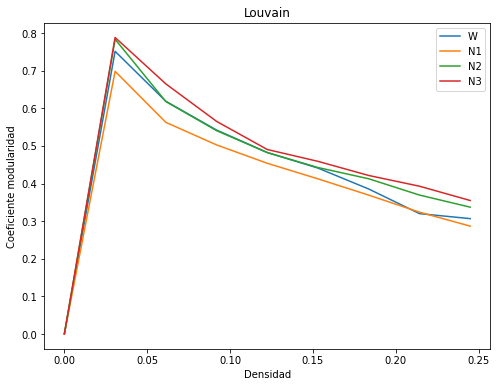

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(densidad[0:9],modularidad[0:9], label="W")
plt.plot(densidad[0:9],modularidad[10:19], label="N1")
plt.plot(densidad[0:9],modularidad[20:29], label="N2")
plt.plot(densidad[0:9],modularidad[30:39], label="N3")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("Louvain");
plt.legend();
plt.show

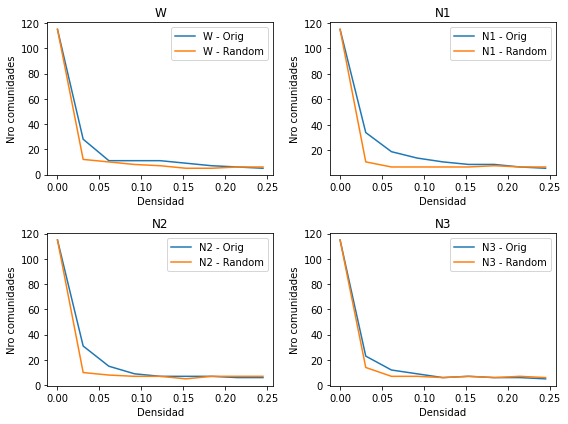

In [14]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.plot(densidad[0:9],comunidades[0:9], label="W - Orig")
plt.plot(densidad[0:9],comunidades2[0:9], label="W - Random")
plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("W");
plt.legend();

plt.subplot(2,2,2)
plt.plot(densidad[0:9],comunidades[10:19], label="N1 - Orig")
plt.plot(densidad[0:9],comunidades2[10:19], label="N1 - Random")
plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("N1");
plt.legend();

plt.subplot(2,2,3)
plt.plot(densidad[0:9],comunidades[20:29], label="N2 - Orig")
plt.plot(densidad[0:9],comunidades2[20:29], label="N2 - Random")
plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("N2");
plt.legend();


plt.subplot(2,2,4)
plt.plot(densidad[0:9],comunidades[30:39], label="N3 - Orig")
plt.plot(densidad[0:9],comunidades2[30:39], label="N3 - Random")
plt.xlabel("Densidad")
plt.ylabel("Nro comunidades")
plt.title("N3");
plt.legend();

plt.tight_layout()


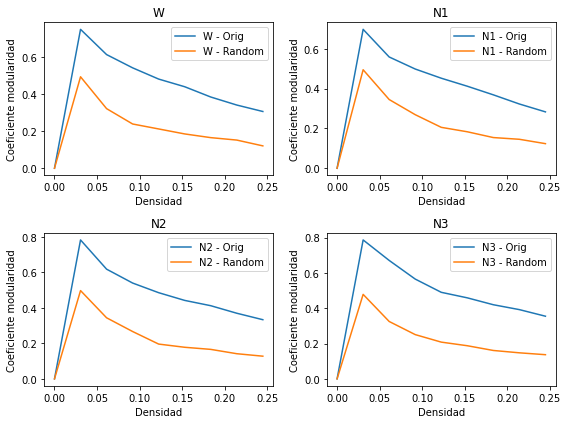

In [15]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.plot(densidad[0:9],modularidad[0:9], label="W - Orig")
plt.plot(densidad[0:9],modularidad2[0:9], label="W - Random")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("W");
plt.legend();

plt.subplot(2,2,2)
plt.plot(densidad[0:9],modularidad[10:19], label="N1 - Orig")
plt.plot(densidad[0:9],modularidad2[10:19], label="N1 - Random")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("N1");
plt.legend();

plt.subplot(2,2,3)
plt.plot(densidad[0:9],modularidad[20:29], label="N2 - Orig")
plt.plot(densidad[0:9],modularidad2[20:29], label="N2 - Random")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("N2");
plt.legend();


plt.subplot(2,2,4)
plt.plot(densidad[0:9],modularidad[30:39], label="N3 - Orig")
plt.plot(densidad[0:9],modularidad2[30:39], label="N3 - Random")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("N3");
plt.legend();

plt.tight_layout()


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(densidad[0:9],modularidad2[0:9], label="W")
plt.plot(densidad[0:9],modularidad2[10:19], label="N1")
plt.plot(densidad[0:9],modularidad2[20:29], label="N2")
plt.plot(densidad[0:9],modularidad2[30:39], label="N3")
plt.xlabel("Densidad")
plt.ylabel("Coeficiente modularidad")
plt.title("Louvain - Random");
plt.legend();
plt.show

In [ ]:
repetitions = 50
data = []
for i in range(repetitions):
    d = {}
    for j in  range(0 , len(densities)):
      G = nx.barabasi_albert_graph(graphs["W"][j].number_of_nodes(),4,seed=i)
      d['ba_avg_clus'] = nx.average_clustering(G)
      d['ba_avg_degree'] = G.number_of_edges()/G.number_of_nodes()
      d['ba_alpha'] = powerlaw.Fit([d for n, d in G.degree],discrete=True,xmin=8).alpha
      G = nx.gnm_random_graph(graphs["W"][j].number_of_nodes(),graphs["W"][j].number_of_edges())    
      d['er_avg_clus'] = nx.average_clustering(G)
      G = nx.watts_strogatz_graph(graphs["W"][j].number_of_nodes(),8,0.02)
      d['ws_avg_degree']=G.number_of_edges()/G.number_of_nodes()
      d['ws_avg_clus'] = nx.average_clustering(G)
      data.append(d)

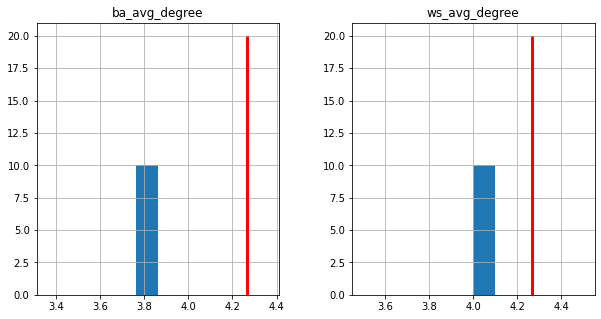

In [ ]:
#G1=graphs["W"][12]
#promedio=G1.number_of_edges()/G1.number_of_nodes()
df = pd.DataFrame(data)
axs = df.filter(regex='avg_degree').hist(figsize=(10,5),density=True)
for ax in axs.flatten():
    ax.vlines(promedio,0,20,lw=3,color='r')

In [ ]:
df_per_degree = pd.DataFrame(graphs["W"][12].degree,columns=['Node','Degree']).set_index('Node')
df_obs_degree = pd.DataFrame(G_obs.degree,columns=['Node','Degree']).set_index('Node')


plt.figure(figsize=(8,4));
df_obs_degree.hist(density=True, histtype='step',label='Observado', cumulative=-1);
df_per_degree.hist(density=True,ax=plt.gca(), histtype='step',label='Percibido', cumulative=-1);
plt.legend();

NameError: ignored

In [ ]:
def plotComparacionesNx_W(ttests, correccion = None):
    plt.figure(figsize = (30,20))

    metricas = {'Modularidad': 'Q', 'Numero de Comunidades': 'Nc'}
    nro_subplot = 1

    for metrica in metricas:
        metrica_val = metricas[metrica]
        for etapa in ['N1', 'N2', 'N3']:
            # Filtramos los sujetos del estadio Nx
            filtro = ttests.query('Nx == "' + etapa + '"')

            # Config inicial del subplot
            plt.subplot(3, 3, nro_subplot)
            plt.title('W vs ' + etapa)
            plt.xlabel('Densidad de aristas (d)')
            plt.ylabel(metrica + ' (' + metrica_val + ')')

            # Plot curva Nx
            plt.errorbar(rango_tp, filtro['mean_Nx_' + metrica_val], yerr = filtro['sem_Nx_' + metrica_val], label = metrica + ' - ' + etapa)
            # Plot curva W
            plt.errorbar(rango_tp, filtro['mean_W_' + metrica_val], yerr = filtro['sem_Nx_' + metrica_val], label = metrica + ' - W')
            # Plot puntos significativos
            label = 'Significativas'
            if correccion:
                label += ' ' + correccion
                filtro_pvalue = filtro[ isSignificative(filtro['pvalue_' + metrica_val], nivel_signif, {'metodo': correccion, 'n': len(rango_tp)}) ]
            else:
                filtro_pvalue = filtro[ isSignificative(filtro['pvalue_' + metrica_val], nivel_signif) ]
            #filtro_pvalue = filtro.query('pvalue_' + metrica_val + ' < ' + str(nivel_signif))
            plt.plot(filtro_pvalue.densidad, np.repeat(0, filtro_pvalue.shape[0]), color='green', marker='o', linestyle='none', markersize=6, label=label)

            # Config leyenda del subplot
            leg = plt.legend(loc='upper right', ncol=1, shadow=True, fancybox=True)
            leg.get_frame().set_alpha(0.5)
            
            nro_subplot += 1

In [ ]:
#armar dataframe de tests

#'mean_Nx_' 
#'mean_W_'
#'pvalue_'
#'sem_Nx_'

